Lab 4, Aleksandr Berezutskii, group 4, Skoltech 2018

Determining and removing drawbacks of exponential and running mean. Task 2

The objective of this laboratory work is to determine conditions for which broadly used
methods of running and exponential mean provide effective solution and conditions under which
they break down. Important outcome of this exercise is getting skill to choose the most effective
method in conditions of uncertainty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Part I. Comparison of the traditional 13-month running mean with the forward-backward exponential smoothing for approximation of 11-year sunspot cycle.

First of all we need to download monthly mean sunspot number data

In [2]:
data_group4 = np.array(np.loadtxt(r"C:\Users\Aleksandr\Desktop\Skoltech\Experimental data processing\Lab_4\Data_Text\Sunspot\data_group4.txt"))

Let's check what we have imported. The format is as follows: year, month, monthly mean sunspot number

In [3]:
data_group4

array([[  1.87800000e+03,   6.00000000e+00,   1.07000000e+01],
       [  1.87800000e+03,   7.00000000e+00,   2.00000000e-01],
       [  1.87800000e+03,   8.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.91300000e+03,   1.10000000e+01,   1.20000000e+00],
       [  1.91300000e+03,   1.20000000e+01,   6.30000000e+00],
       [  1.91400000e+03,   1.00000000e+00,   4.70000000e+00]])

Before we start working it is convenient to extract each of 4 arrays of data

In [4]:
#year
year=[]
for i in range(len(data_group4)):
    year=np.append(year, data_group4[i,0])
    
#month
month=[]
for i in range(len(data_group4)):
    month=np.append(month, data_group4[i,1])
    
#monthly sunspot number
ssn=[]
for i in range(len(data_group4)):
    ssn=np.append(ssn, data_group4[i,2])

Let's make smoothing of monthly mean data by 13-month running mean

In [5]:
#13-month running mean
ssnRM = []
for i in range(6,len(ssn)-6):
    ssnRM = np.append(ssnRM, ssn[i-6]/24 + (ssn[i-5] + ssn[i-4] + ssn[i-3] + ssn[i-2] + ssn[i-1] + ssn[i] + ssn[i+1] + ssn[i+2] + ssn[i+3] + ssn[i+4] + ssn[i+5])/12 + ssn[i+6]/24)
for i in range(6):
    ssnRM = np.append(ssnRM, ssn[i])
    ssnRM = np.append(ssnRM, ssn[-i])

In [6]:
#deviation and variability indicators for 13-month running mean
DIRM=0
VIRM=0
for i in range(len(ssn)):
    DIRM += (ssn[i] - ssnRM[i])**2
for i in range(len(ssn)-2):
    VIRM += (ssnRM[i+2] - 2*ssnRM[i+1] + ssnRM[i])**2
print('Deviation indicator for 13-month running mean is', DIRM)
print('Variation indicator for 13-month running mean is', VIRM)

Deviation indicator for 13-month running mean is 240841.868767
Variation indicator for 13-month running mean is 2217.97098958


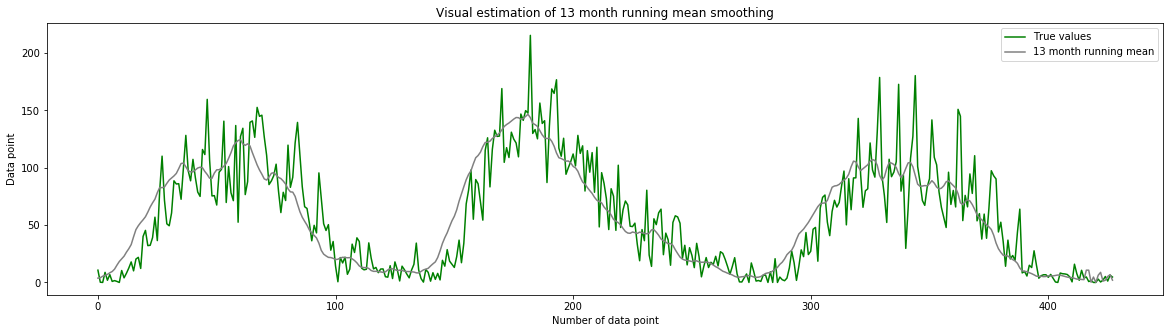

In [7]:
plt.figure(figsize=(20,5))
plt.plot(ssn, '-', color='green', label='True values')
plt.plot(ssnRM, '-', color='gray', label='13 month running mean')
plt.title('Visual estimation of 13 month running mean smoothing')
plt.ylabel('Data point')
plt.xlabel('Number of data point')
plt.legend(['True values', '13 month running mean'], loc = 'best')

plt.show()

Let's make smoothing of monthly mean data by forward-backward exponential smoothing for different alphas and plot deviation and variability indicators

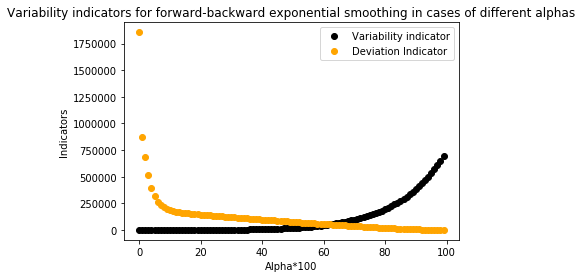

In [8]:
DIES = np.zeros(100)
VIES = np.zeros(100)
for alpha in range (0,100):
    ssnFES = np.zeros(len(ssn))
    ssnFES[0] = ssn[0]
    for i in range(1,len(ssn)):
        ssnFES[i] = ssnFES[i-1] + (alpha/100)*(ssn[i] - ssnFES[i-1])
    
    ssnBES = np.zeros(len(ssn))
    ssnBES[len(ssn)-1] = ssnFES[len(ssn)-1]
    for i in range(len(ssn)-2, 0, -1):
        ssnBES[i] = ssnBES[i+1] + (alpha/100)*(ssnFES[i] - ssnBES[i+1])                                      
    
    for i in range(len(ssn)):
        DIES[alpha] += (ssn[i] - ssnBES[i])**2
    
    for i in range(len(ssn)-2):
        VIES[alpha] += (ssnBES[i+2] - 2*ssnBES[i+1] + ssnBES[i])**2


plt.plot(VIES, 'o', color='black')
plt.plot(DIES, 'o', color='orange')
plt.title('Variability indicators for forward-backward exponential smoothing in cases of different alphas')
plt.ylabel('Indicators')
plt.xlabel('Alpha*100')
plt.legend(['Variability indicator','Deviation Indicator'], loc = 'best')
plt.show()

$\alpha \approx 0.62$ seems to be around optimal

In [9]:
alpha=62.5
ssnFES = np.zeros(len(ssn))
ssnFES[0] = ssn[0]
DIES1=0
VIES1=0
for i in range(1,len(ssn)):
    ssnFES[i] = ssnFES[i-1] + (alpha/100)*(ssn[i] - ssnFES[i-1])
    
ssnBES = np.zeros(len(ssn))
ssnBES[len(ssn)-1] = ssnFES[len(ssn)-1]
for i in range(len(ssn)-2, 0, -1):
    ssnBES[i] = ssnBES[i+1] + (alpha/100)*(ssnFES[i] - ssnBES[i+1])

for i in range(len(ssn)):
        DIES1 += (ssn[i] - ssnBES[i])**2
    
for i in range(len(ssn)-2):
        VIES1 += (ssnBES[i+2] - 2*ssnBES[i+1] + ssnBES[i])**2

print('Deviation indicator for forward-backward exponential smooth is', DIES1)
print('Variation indicator for forward-backward exponential smooth is', VIES1)

Deviation indicator for forward-backward exponential smooth is 50285.5861903
Variation indicator for forward-backward exponential smooth is 54445.6548953


Let us now plot the data

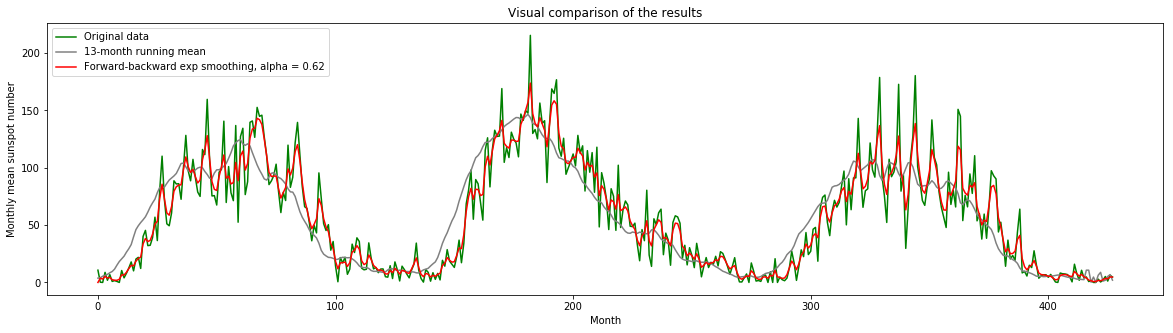

In [10]:
plt.figure(figsize=(20,5))
plt.plot(ssn,'-', color='green', label='Original data')
plt.plot(ssnRM,'-',color='gray', label='13-month running mean')
plt.plot(ssnBES,'-',color='red', label='Forward-backward exp smoothing, alpha=0.62')
plt.title('Visual comparison of the results')
plt.ylabel('Monthly mean sunspot number')
plt.xlabel('Month')
plt.legend(['Original data', '13-month running mean', 'Forward-backward exp smoothing, alpha = 0.62'], loc = 'best')
plt.show()

We can see that 13-month running mean smoothing methid provides extremely smooth data, that is a pleasure to spectate, but this method ignores dynamics of the data. By applying forward-backward exponential smoothing we've smoothed the data but also concerved the typical peaks and lows of the curve.

Part II. 3D surface filtration using forward-backward smoothing

Let's import surface data, that are matrices presenting the surfaces

In [11]:
true = np.array(np.loadtxt(r"C:\Users\Aleksandr\Desktop\Skoltech\Experimental data processing\Lab_4\Data_Text\Surface\true_surface.txt"))
noisy = np.array(np.loadtxt(r"C:\Users\Aleksandr\Desktop\Skoltech\Experimental data processing\Lab_4\Data_Text\Surface\noisy_surface.txt"))

Now we'll plot noisy and true surfaces for visualization purposes, accompanying plots with colorbars.

In [12]:
def surface_plot (matrix, **kwargs):
    # acquire the cartesian coordinate matrices from the matrix
    # x is cols, y is rows
    (x, y) = np.meshgrid(np.arange(matrix.shape[0]), np.arange(matrix.shape[1]))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, matrix, **kwargs)
    return (fig, ax, surf)

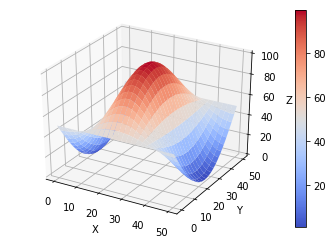

In [13]:
(fig, ax, surf) = surface_plot(true, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

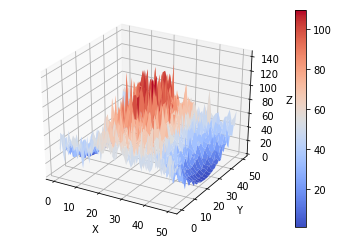

In [14]:
(fig, ax, surf) = surface_plot(noisy, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In the following cell we'll make a 1D array ($T$ and $N$) from each matrix so it will be easier to compare them

In [15]:
true_line = np.reshape(true, np.shape(true)[0]**2)
noisy_line = np.reshape(noisy, np.shape(true)[0]**2)

Now we'll determine the variance of deviation $\sigma^2$ of noisy surface from the true one
$$
\sigma^2 = \cfrac{1}{N-1}\sum_{i=1}^N (T[i] - N[i])^2
$$

In [16]:
Var=0
for i in range(1,np.shape(true)[0]**2):
    Var+=(1/(np.shape(true)[0]**2-1))*(true_line[i]-noisy_line[i])**2
print('The variance of deviation is', Var)

The variance of deviation is 122.824317607


Now we will apply forward-backward exponential smoothing to filter noisy surface measurements. The smoothing constant will be a = 0.335. It will take 4 steps.


But first of all let's again plot the noisy figure so that we can track our progress through the steps

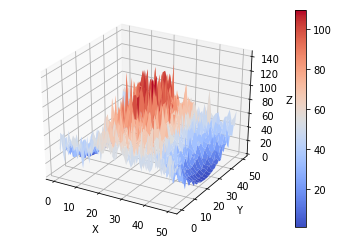

In [17]:
(fig, ax, surf) = surface_plot(noisy, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 1: Forward exponential smoothing of rows (from left to right)

In [18]:
#first of all we'll define a new matrix
ES = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))
a=0.624

for i in range(np.shape(noisy)[0]):
    ES[i,0] = true[i,0]

    for j in range(2, np.shape(noisy)[0]):
        ES[i,j] = ES[i,j-1] + a*(noisy[i,j] - ES[i,j-1])

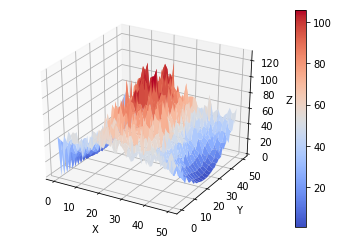

In [19]:
(fig, ax, surf) = surface_plot(ES, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 2: Backward exponential smoothing of results obtained at step 1 (from right to left)

In [20]:
BES = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BES[i, np.shape(true)[0]-1] = ES[i, np.shape(true)[0]-1]
    
    for j in range(np.shape(noisy)[0]-2, 0, -1):
        BES[i,j] = BES[i,j+1] + a*(ES[i,j] - BES[i, j+1])

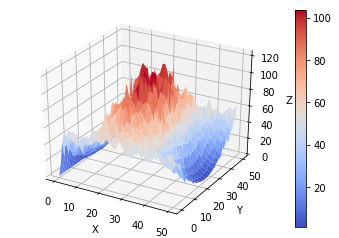

In [21]:
(fig, ax, surf) = surface_plot(BES, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 3: Forward exponential smoothing of results obtained at step 2 along the columns (from bottom to top)

In [22]:
FEScol = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    FEScol[0,i] = BES[0,i]

    for j in range(2, np.shape(noisy)[0]):
        FEScol[i,j] = FEScol[i-1,j] + a*(BES[i,j] - FEScol[i-1,j])

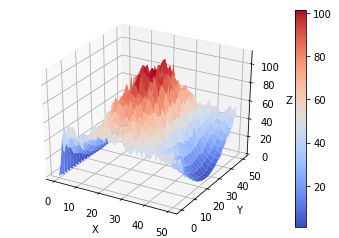

In [23]:
(fig, ax, surf) = surface_plot(FEScol, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Step 4: Backward exponential smoothing of results obtained at step 3 along the columns (from top to bottom)

In [24]:
BEScol = np.zeros((np.shape(noisy)[0],np.shape(noisy)[0]))

for i in range(np.shape(noisy)[0]):
    BEScol[np.shape(true)[0]-1, i] = FEScol[np.shape(true)[0]-1, i]
    
    for j in range(np.shape(noisy)[0]-2, 0, -1):
        BEScol[i,j] = BEScol[i,j+1] + a*(FEScol[i,j] - BEScol[i, j+1])

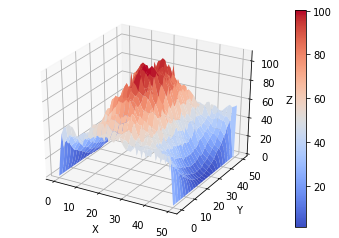

In [25]:
(fig, ax, surf) = surface_plot(BEScol, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

Now we'll plot the true surface to compare

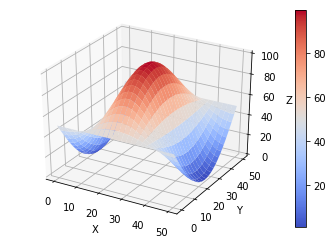

In [26]:
(fig, ax, surf) = surface_plot(true, cmap=plt.cm.coolwarm)

fig.colorbar(surf)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [27]:
#Here we'll reshape the last matrix which we used in smoothing
BEScol_line = np.reshape(BEScol, np.shape(true)[0]**2)

In [28]:
Var = 0
for i in range(1,np.shape(true)[0]**2):
    Var += (1/(np.shape(true)[0]**2-1))*(true_line[i]-BEScol_line[i])**2
print('The variance of deviation is', Var)

The variance of deviation is 46.0801835941


That is, we made rather bad smoothing, it can be seen with eyes, but the variation is smaller, which I think is an evidence of the fact that shape is mostly conserved, but noise is still present.